<img src="https://raw.githubusercontent.com/CristianR8/Imagenes-Espectrales-Sesion4-Parte1-HoCV/main/images/banner-spectral.png" width="1000" align="middle"/>

# <font color='#ECA702'>**Hands-on Sesión 4: Imágenes Espectrales - Introducción 🔬🌈📸🌌**</font>




### <font>**Importamos datos necesarios**</font>

In [1]:
# NO MODIFIQUES ESTA CELDA
!pip install gdown
!pip install pysptools
!pip install quadprog
!pip install rasterio
!pip install scipy

!gdown --id 1XCSxRzf45-YfzEYU14kjDOPmAwjAdyxx
!gdown --id 1xMk-YVcaSxSISSdUDDsFWtfBGe4N2k8f
!gdown --id 1ob4CwfeG-g2PWaxJdnmFnF4gB0e9Dd8d
!gdown --id 1ZjpMKaMTSLbM4x3XpMCpootVjkLiFWde
!gdown --id 1ISmN6kO38Nsq-tqZvKog9rUv6SUj9GlI

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 17.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pysptools: filename=pysptools-0.15.0-py3-none-any.whl size=8133730 sha256=9140f735fe8afadf2f23165f2dc549f81a8d5e25ee85d63075eab8f8f17cf7bc
  Stored in directory: /root/.cache/pip/wheels/cf/fc/d3/0af346dd85827b7411342d0b44507a59d637a995c7e0f00fa6
Successfully built pysptools
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.4/548.4 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 82.3 MB/s eta 0:00:00
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1XCSxRzf45-YfzEYU14kjDOPmAwjAdyxx
From (redirected): https://drive.google.com/uc?id=1XCSxRzf45-YfzEYU14kjDOPmAwjAdyxx&confirm=t&uuid=7fd2e2a7-

### <font>**Importamos las librerias**</font>


In [2]:
import os.path
from scipy.io import loadmat
from IPython.display import display, HTML
import numpy as np
import requests
from io import BytesIO
import scipy.io
import itertools

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
default_dpi = mpl.rcParamsDefault['figure.dpi']
mpl.rcParams['figure.dpi'] = default_dpi*2 # ejecutar esto para hacer las cifras más grandes, a menudo tienen que ejecutar el bloque varias veces para que tome

# <font color='#4C5FDA'>**Introducción: manejo de imágenes espectrales**</font>

- Imágenes tradicionales: tres bandas de color básicas (rojo, verde y azul)

- Imágenes espectrales: decenas, cientos o incluso miles de bandas espectrales, cubriendo rangos desde el ultravioleta, pasando por el visible, y extendiéndose hasta el infrarrojo y más allá.

<div style="text-align: center;">
  <img src="https://raw.githubusercontent.com/CristianR8/Imagenes-Espectrales-Sesion4-Parte1-HoCV/main/images/Picture00.png" alt="Imagenes espectrales" style="width: 600px;"/>
</div>

## <font >**Descripción**</font>

- Una imagen de un sensor hiperespectral es un cubo de datos con dos dimensiones espaciales y una espectral (latitud x longitud x número de bandas espectrales).

- Una banda espectral mide una longitud de onda específica del espectro electromagnético.

- Cada píxel (latitud x longitud) del cubo de datos hiperespectral tiene un espectro.

<div style="text-align: center;">
    <img src="https://raw.githubusercontent.com/CristianR8/Imagenes-Espectrales-Sesion4-Parte1-HoCV/main/images/Picture02.png" width="400" align="middle"/>
</div>



## <font>**Información de los datos**</font>

Los datos con los que trabajaremos son el "MUUFL Gulfport Dataset".  Este conjunto de datos es un cubo de imágenes hiperespectrales y una nube de puntos LiDAR co-registrada recogida sobre el campus de la Universidad de Mississippi - Gulfpark.  Los datos tienen etiquetas de clase/cobertura del suelo, así como varios objetivos de superpíxel y subpíxel colocados por toda la escena.

<table style="width:100%; table-layout:fixed;">
  <tr>
    <td style="text-align:center;">
      <img src="https://raw.githubusercontent.com/CristianR8/Imagenes-Espectrales-Sesion4-Parte1-HoCV/main/images/gulfpark01.jpg" alt="MUUFL Gulfport 01" width="600px"/>
    </td>
    <td style="text-align:center;">
      <img src="https://raw.githubusercontent.com/CristianR8/Imagenes-Espectrales-Sesion4-Parte1-HoCV/main/images/gulfpark02.jpeg" alt="MUUFL Gulfport 02" width="600px"/>
    </td>
  </tr>
</table>



Estos datos pueden obtenerse aquí: <url>https://github.com/GatorSense/MUUFLGulfport</url>

## <font><small>**Cargamos los datos**</small></font>

In [3]:
# cargar imagen del campus de gulfport
img_frame = 'muufl_gulfport_campus_1_hsi_220_label.mat'
spectra_fname = 'tgt_img_spectra.mat'

dataset = loadmat(img_frame)

hsi= dataset['hsi']['Data'][0][0] # los datos de matlab vienen como listas anidadas

## Cargar y visualizar datos hiperespectrales!

Recuerda que los datos de matlab vienen como arrays anidados en python ;)

En este [link](https://github.com/GatorSense/MUUFLGulfport/tree/master/MUUFLGulfportSceneLabels) encontrarás la documentación de las imágenes espectrales que usaremos :)



In [4]:
# comprueba la forma de los datos
n_r,n_c,n_b = hsi.shape
print(hsi.shape)

(325, 220, 64)


[0.11941317 0.12941825 0.12522253 0.1391035  0.14791837 0.14910202
 0.15510847 0.16039191 0.16537927 0.16584203 0.17336918 0.17909065
 0.19999905 0.22057644 0.23784612 0.25534788 0.26681775 0.28204963
 0.28477132 0.30463055 0.30924085 0.31154665 0.31463435 0.31952152
 0.3233149  0.32578483 0.327852   0.32664454 0.3259257  0.32733876
 0.32459286 0.32025987 0.32200044 0.315066   0.31873414 0.32105303
 0.31563038 0.29875252 0.3240105  0.32055503 0.31932706 0.31826085
 0.31012446 0.3126116  0.30968955 0.31759083 0.3170822  0.31232488
 0.31597534 0.31115898 0.2988538  0.29301825 0.3051114  0.3184233
 0.29768857 0.28915167 0.29723105 0.25576168 0.29809833 0.2842963
 0.30964312 0.27555722 0.31250447 0.31816146]


Text(0.5, 1.0, 'Spectrum from Pixel 5,7')

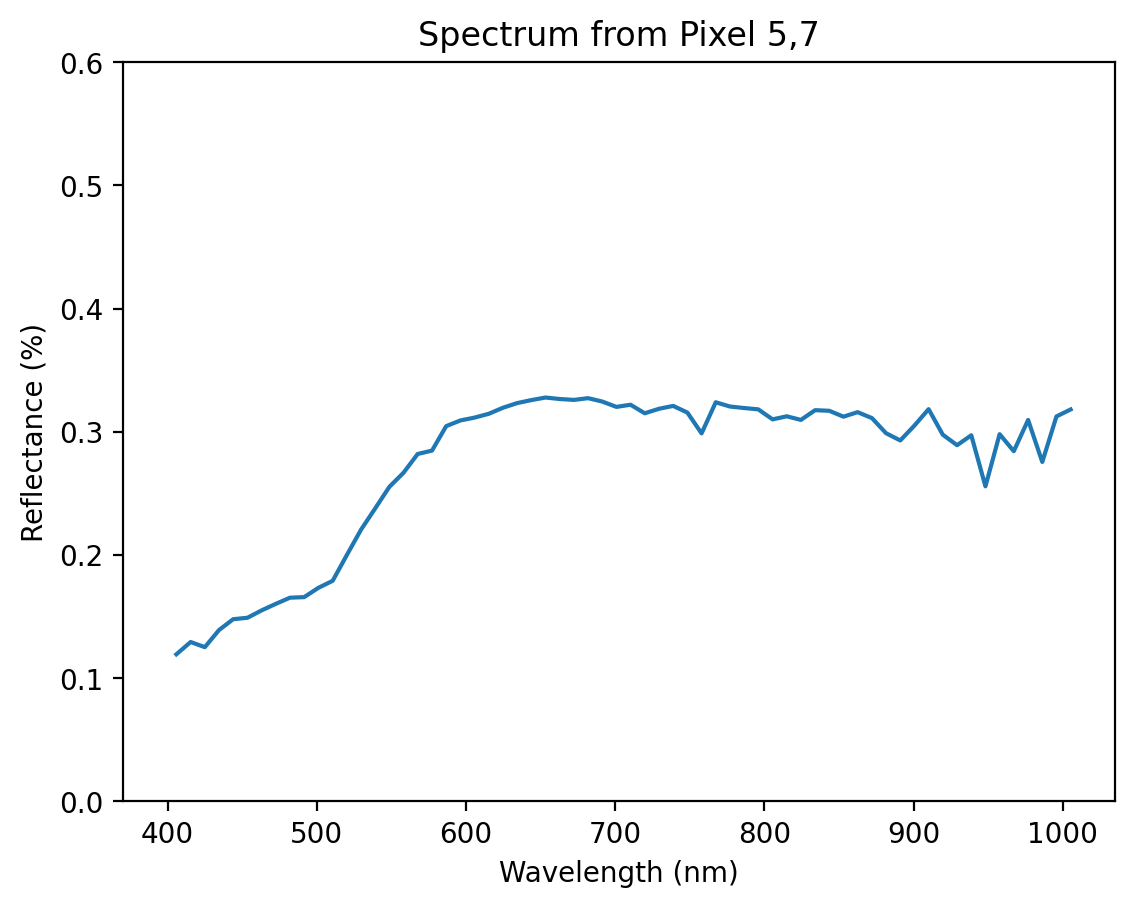

In [5]:
# extraer un píxel/espectro aleatorio
# Ejercicio:  Cambia los valores rr y cc para imprimir diferentes píxeles/espectro alrededor de la imagen y traza los espectros (dos celdas siguientes)
rr,cc = 5, 7
spectrum = hsi[rr,cc,:]
print(spectrum)

# trazar un espectro

# Necesitamos etiquetar los ejes
wavelengths = dataset['hsi']['info'][0][0]['wavelength'][0][0]

plt.plot(wavelengths,spectrum)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance (%)')
plt.ylim([0, 0.6])
plt.xlim([370, 1035])
plt.title(('Spectrum from Pixel ' + str(rr)+ ','+str(cc)))

## **<font color='#ECA702'>**<font color='#ECA702'>**<font color="#FF0000">R</font><font color="#FF7F00">e</font><font color="#FFFF00">t</font><font color="#00FF00">o</font><font color="#0000FF"> #</font><font color="#9400D3">1</font> 💪**</font>


*   Trazar una imagen de una banda individual
*   Ejercicio: Cambia el número de banda en la línea de abajo para ver diferentes bandas de la imagen HSI.
* Encontrar los números de banda para las longitudes de onda aproximadas del rojo, verde y azul (RGB).
* Hacer una imagen psuedo-RGB a partir de las bandas adecuadas
* **<font color="#FF0000">E</font><font color="#FF7F00">x</font><font color="#FFFF00">t</font><font color="#00FF00">r</font><font color="#0000FF">a</font>:** Realizar una transformación para mejorar la visualización de la imagen.



Text(0.5, 1.0, 'A single band of Hyperspectral Image in False Color')

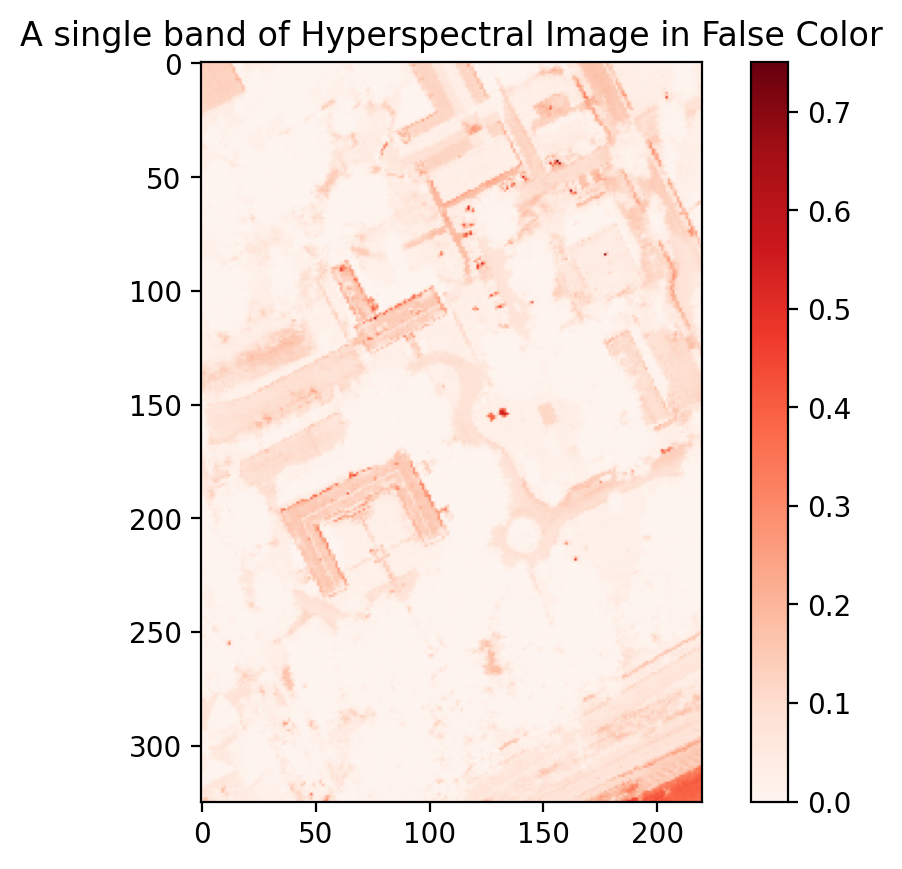

In [6]:
# trazar una imagen de una banda individual
# Ejercicio: Cambia el número de banda en la línea de abajo para ver diferentes bandas de la imagen HSI
plt.imshow(hsi[:,:,1],vmin=0,vmax=.75,cmap='Reds')
plt.colorbar()
plt.title('A single band of Hyperspectral Image in False Color')

In [7]:
b = 5
g = 16
r = 26

In [8]:
# encontrar los números de banda para las longitudes de onda aproximadas del rojo, verde y azul (RGB)
wavelengths[r],wavelengths[g],wavelengths[b] # Obtenemos las longitudes de onda de esas bandas

(array([653.299988]), array([558.099976]), array([453.5]))

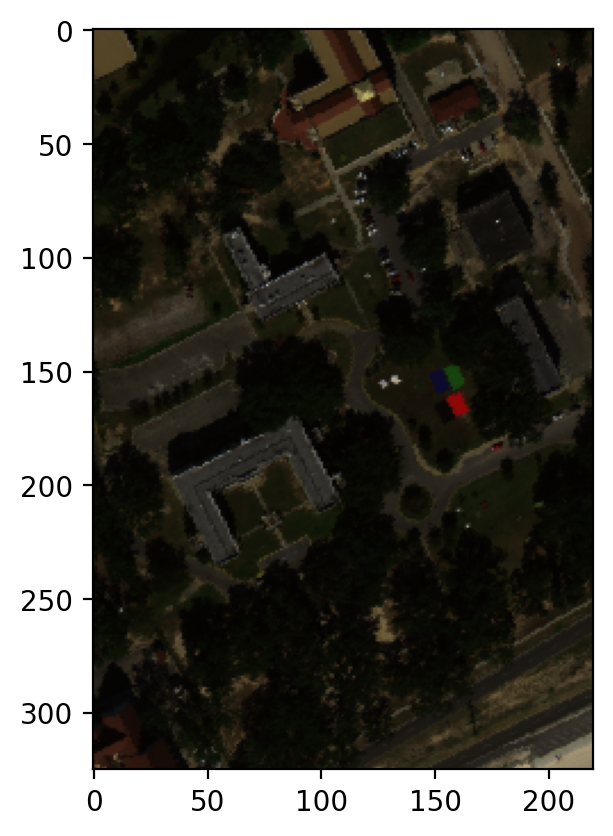

In [9]:
# Hacer una imagen psuedo-RGB a partir de las bandas adecuadas
psuedo_rgb = hsi[:,:,(r,g,b)]
psuedo_rgb = np.clip(psuedo_rgb,0,1.0)
plt.imshow(psuedo_rgb)

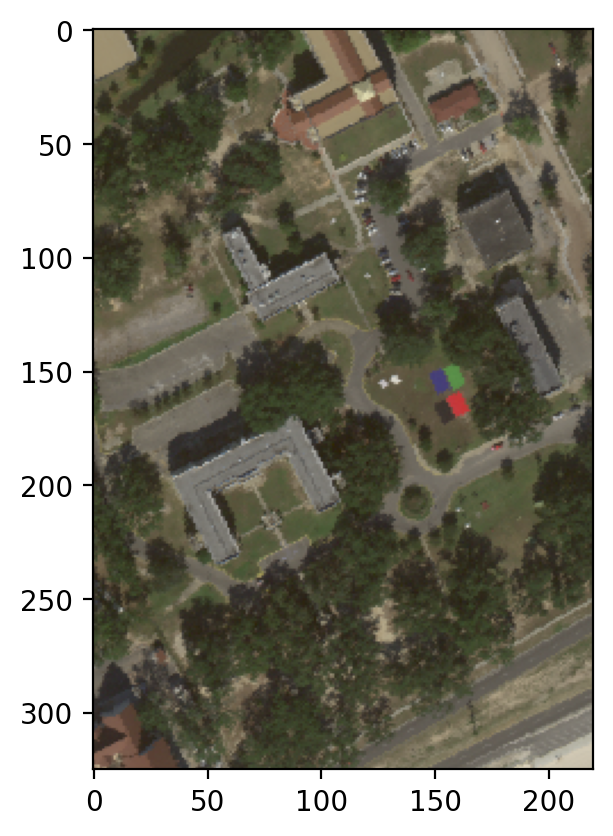

In [10]:
# Es demasiado oscuro. Añadimos un poco de corrección gamma
plt.imshow(psuedo_rgb ** (1/2.3))

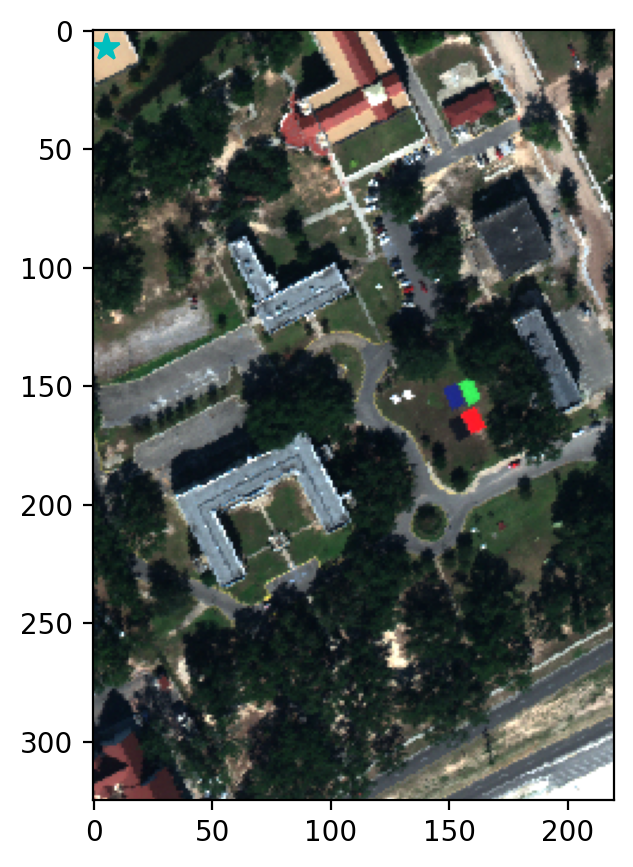

In [11]:
rgb_best = dataset["hsi"]['RGB'][0][0]

# comparar con la imagen RGB proporcionada (hecha con una mejor selección/ponderación de bandas)
plt.figure(figsize=(5,5))
plt.imshow(rgb_best)
plt.plot(rr,cc,'c*',markersize=10) #etiquetar la ubicación del píxel seleccionado en el gráfico anterior

# <font color='#4C5FDA'>**Sensado remoto con imágenes espectrales**</font>

Las <font color="#FF0000">I</font><font color="#FF7F00">m</font><font color="#FFFF00">a</font><font color="#00FF00">g</font><font color="#0000FF">e</font><font color="#0000FF">n</font><font color="#9400D3">e</font><font color="#FF0000">s</font> <font color="#FF7F00">E</font><font color="#FFFF00">s</font><font color="#00FF00">p</font><font color="#0000FF">e</font><font color="#0000FF">c</font><font color="#9400D3">t</font><font color="#FF0000">r</font><font color="#FF7F00">a</font><font color="#FFFF00">l</font><font color="#00FF00">e</font><font color="#0000FF">s</font> son como darle "superpoderes" a una cámara para ver lo que nuestros ojos no pueden. A continuación vamos a ver como trabajar con estas imágenes!

<div align="center"> <image src="https://github.com/semilleroCV/Hands-on-Computer-Vision/blob/2024/Sesiones/Sesion4/Parte-1/images/cubo-hiperespetral.jpg?raw=true" width=600>  </div>


## **Contenido**

[**1. Paso 1: Obtener los datos**](#tema1)

[**2. Paso 2: Arreglar los datos**](#tema2)

[**3. Paso 3: Visualizar las imágenes**](#tema3)

## <font color='#ECA702'>**Paso 1: Obtener los datos 😎**</font><a name="tema1">


🌐 **¿Dónde conseguir imágenes multiespectrales para sensado remoto?**  




Hay plataformas en linea como [NASA's Earthdata Search](https://search.earthdata.nasa.gov) donde podemos obtener datos de misiones satelitales de forma completamente gratuita!

Normalmente en todas las plataformas el proceso para descargar las imágenes es muy similar, pero primero lo más importante es saber qué imágenes nos interesa descargar y buscar un satelite que las tenga:

---

🛰️ **Cómo elegir el satélite adecuado para tus imágenes**  

Antes de descargar imágenes, **es clave saber qué satélite te sirve**. Cada uno tiene características distintas que pueden afectar tus resultados. Vamos por partes:  


* 🌍 **1. Órbita, cobertura y frecuencia temporal**: ¿Cuándo y por dónde pasa este satelite? Si no pasa sobre tu zona de interés, o pasa con muy poca frecuencia puede que no sea el adecuado para tu aplicación!

* 🔍 **2. Resolución espacial (detalle de la imagen)**: ¿Cuál es la resolución por pixel que logra captar este sensor? A nivel de centímetros, metros o kilómetros. Todo depende de el nivel de detalle que quieras tener. ¿Necesitas ver hojas de plantas o solo distinguir bosque de pasto?*  


* 🌈 **3. Resolución espectral (qué partes de la luz capta)**: RGB, Multiespectral o **Hiperespectral**. Si necesitas diferenciar materiales o vegetación estresada, apunta a sensores infrarrojos o hiperespectrales.  

* 📅 **3. Periodo de actividad (¿sigue funcionando?)**: Las misiones satelitales tienen un inicio y un fin. No descartes los datos viejos, a veces son perfectos para análisis históricos.

### 🌍 <font color='#ECA702'>Nuestra elección: **Hyperion, el sensor hiperespectral de la NASA**</font>

🚀 **Origen y misión**  
- **Hyperion** fue parte de la carga útil del satélite **Earth Observing-1 (EO-1)**, lanzado en el año **2000** por la **NASA**.  
- Su misión **ha finalizado en 2017**, pero sus datos siguen siendo **invaluables** para la comunidad científica.  

🔬 **Características clave del sensor**  
- 📡 **220 bandas espectrales**: Captura datos desde **400 a 2500 nanómetros**, cubriendo:  
  - 🎯 **Espectro visible**  
  - 🌞 **Infrarrojo cercano**  
- 🛰️ **Resolución espacial**: **30 metros por píxel**  

🌟 **¿Qué hace tan especial a Hyperion?**  
- Permite una **identificación y clasificación precisa** de materiales en la superficie terrestre.  
- Proporciona una **perspectiva detallada y única** de la Tierra.  


<div align="center"> <image src="https://github.com/semilleroCV/Hands-on-Computer-Vision/blob/2024/Sesiones/Sesion4/Parte-1/images/Hyperion.jpeg?raw=true" width=500>  </div>

Enlace: https://www.usgs.gov/centers/eros/science/earth-observing-1-eo-1


---

### 🛠️ **Pasos para descargar las imágenes**  

⭐ **1. Inicia sesión**: crea una cuenta o accede a la plataforma

📍 **2. Define tu zona de interés**: usa el mapa para seleccionar la región que te interesa analizar o usando coordenadas.

📅 **3. Elige una fecha específica**: filtra por la fecha que necesitas.  

🛰️ **4. Selecciona el satélite**: elige el satélite que tenga los datos que buscas.

🔍 **5. La plataforma busca por ti**: automáticamente mostrará las imágenes disponibles según tus criterios.


💾 **6. Elige el formato de descarga**: Selecciona el formato ideal para tu proyecto.  

🎉 **7. ¡Descarga y a trabajar!**: Ahora solo queda analizar los datos y sacar conclusiones increíbles.  




<font color='#4C5FDA'>**1. Acceder al EarthSerch de la NASA**</font>
<br>
<br>
NASA's Earthdata Search es una plataforma en línea avanzada que brinda a los usuarios la capacidad de buscar y acceder a una extensa colección de datos científicos sobre la Tierra, cortesía de la NASA. Esta herramienta ofrece una interfaz intuitiva que facilita la búsqueda de datos de observación terrestre, permitiendo a los usuarios visualizar, filtrar y descargar datos específicos según sus requerimientos. Disponible para cualquier persona que disponga de una cuenta de Earthdata Login, la plataforma proporciona acceso a más de 90 petabytes de información vital sobre el planeta, cubriendo desde el clima y la topografía hasta los ecosistemas.

<br>
<br>
<div align="center"> <image src="https://github.com/semilleroCV/Hands-on-Computer-Vision/blob/2024/Sesiones/Sesion4/Parte-1/images/Earthsearch.png?raw=true" width=700>  </div>


[Enlace al EarthExplorer de la NASA](https://earthexplorer.usgs.gov/)

<br>


<font color='#4C5FDA'>**2. Seleccionar el lugar**</font>

En la sección "Enter Search Criteria", los usuarios pueden personalizar sus métodos de búsqueda, incluyendo la selección de países, fechas específicas o regiones personalizadas.

<br><br>

<div align="center"> <image src="https://github.com/semilleroCV/Hands-on-Computer-Vision/blob/2024/Sesiones/Sesion4/Parte-1/images/searchcircle.png?raw=true" width=700>  </div>

<br><br>

<font color='#4C5FDA'>**3. Seleccionar el Dataset**</font>

La sección "Datasets" ofrece la posibilidad de escoger entre una amplia gama de sensores y bancos de imágenes disponibles en el sitio. Para ilustrar, si seleccionamos el sensor Hyperion, podemos filtrar los datos relevantes dentro de la categoría EO-1.

<br><br>

<div align="center"> <image src="https://github.com/semilleroCV/Hands-on-Computer-Vision/blob/2024/Sesiones/Sesion4/Parte-1/images/SelectedArea.png?raw=true" width=700>  </div>
<br><br>


<font color='#4C5FDA'>**4. Parámetros adicionales y selección de trazas**</font>

En "Additional criteria", se permite añadir especificaciones más detalladas proporcionadas por Hyperion, como el ID del sensor o el tipo de corrección aplicada al sensor, aunque no son necesarios para todos los ejemplos. Una vez definida la zona y el dataset, se procede a seleccionar "Results" en la parte inferior de la pantalla para visualizar las trazas disponibles para descarga.

<br><br>

<div align="center"> <image src="https://github.com/semilleroCV/Hands-on-Computer-Vision/blob/2024/Sesiones/Sesion4/Parte-1/images/Results.png?raw=true" width=700>  </div>


<br><br>

<font color='#4C5FDA'>**5. Descarga de las imágenes**</font>

La plataforma brinda diversas opciones y formatos de descarga, cada uno con sus características y métodos de procesamiento:

**HDF:** Es un formato de archivo diseñado para almacenar y gestionar una vasta cantidad de datos científicos, ajustados con correcciones radiométricas para asegurar mediciones uniformes.

**GeoTiff:** Un formato estándar para imágenes geoespaciales que incluye metadatos de geo-referenciación directamente en el archivo TIFF, ideal para usuarios que requieren una integración precisa con aplicaciones geográficas.

**GIS:** Recomendado para usuarios interesados en integrar imágenes en sistemas de información geográfica (GIS) para mapeo o análisis espacial, sin la necesidad de toda la precisión de datos que ofrece el formato GeoTiff.


<div align="center"> <image src="https://github.com/semilleroCV/Hands-on-Computer-Vision/blob/2024/Sesiones/Sesion4/Parte-1/images/Download.png?raw=true" width=700>  </div>



## <font color='#ECA702'>**Paso 2: Arreglemos nuestro dataset para asegurar la integridad de los datos 🧐**</font><a name="tema2">

Dependiendo de la documentación del sensor que escojamos quizas sea necesario hacer algunos ajustes, como descartar imágenes con poca iluminación, gran cobertura de nubes o bandas espectrales dañadas

Después de descomprimir el archivo .zip, nos encontramos con 242 imágenes, que representan las 242 bandas capturadas por el sensor Hyperion, junto con dos archivos de texto que contienen información relevante sobre el dataset.

<br>
<br>
<div align="center"> <image src="https://github.com/semilleroCV/Hands-on-Computer-Vision/blob/2024/Sesiones/Sesion4/Parte-1/images/descargabandas.png?raw=true" width=700>  </div>



<font color='#4C5FDA'>**Limpieza**</font>

La documentación asociada a Hyperion advierte que algunas de estas bandas contienen información corrupta o dañada. Por tanto, es imprescindible eliminar estas bandas del conjunto de datos antes de proceder a cualquier visualización de imágenes o procesamiento de datos.

<div align="center"> <image src="https://github.com/semilleroCV/Hands-on-Computer-Vision/blob/2024/Sesiones/Sesion4/Parte-1/images/List-of-unused-bands-in-hyperion-sensors.png?raw=true" width=700>  </div>


<font color='#4C5FDA'>**Visualización**</font>

Para obtener detalles específicos sobre cada banda de Hyperion, se puede consultar la siguiente página: https://www.indexdatabase.de/db/s-single.php?id=36.

Con base a la experiencia previa y a recomendaciones encontradas en numerosas investigaciones, se sugiere utilizar las bandas 31, 20 y 10 para crear una imagen RGB. Esta selección es crucial para obtener visualizaciones de alta calidad y para análisis posteriores.

Además, es importante mencionar que cada banda tiene un tamaño aproximado de 3500 x 1700 pixeles, lo cual puede resultar excesivamente grande para ciertos tipos de análisis o visualizaciones. Por ello, aplicando algunas técnicas básicas de procesamiento de imágenes, se recorta un parche de 256x256 pixeles. Este tamaño reducido facilita la manipulación de los datos y es suficiente para obtener una muestra representativa del área de interés.


<div align="center"> <image src="https://github.com/semilleroCV/Hands-on-Computer-Vision/blob/2024/Sesiones/Sesion4/Parte-1/images/Parche.png?raw=true" width=700>  </div>


Con el conjunto ajustado a 158 bandas, tras eliminar las defectuosas, estamos listos para explorar y analizar los datos de Hyperion de manera eficiente. Este paso nos permite abordar la investigación con imágenes precisas y manejables, optimizando nuestro análisis y extracción de información valiosa del terreno examinado.


## <font color='#ECA702'>**Paso 3: Veamos las imágenes!**</font><a name="tema3">


Tras descartar las bandas afectadas, es crucial revisar la estructura del espectro de las bandas restantes. La siguiente gráfica muestra claramente a qué segmentos del espectro electromagnético corresponden las bandas conservadas, información vital para el análisis correcto de las características observadas.

Esta visualización se convertirá en una referencia constante a lo largo del desarrollo del Notebook, indicando que será habitual regresar a ella para consultas recurrentes.

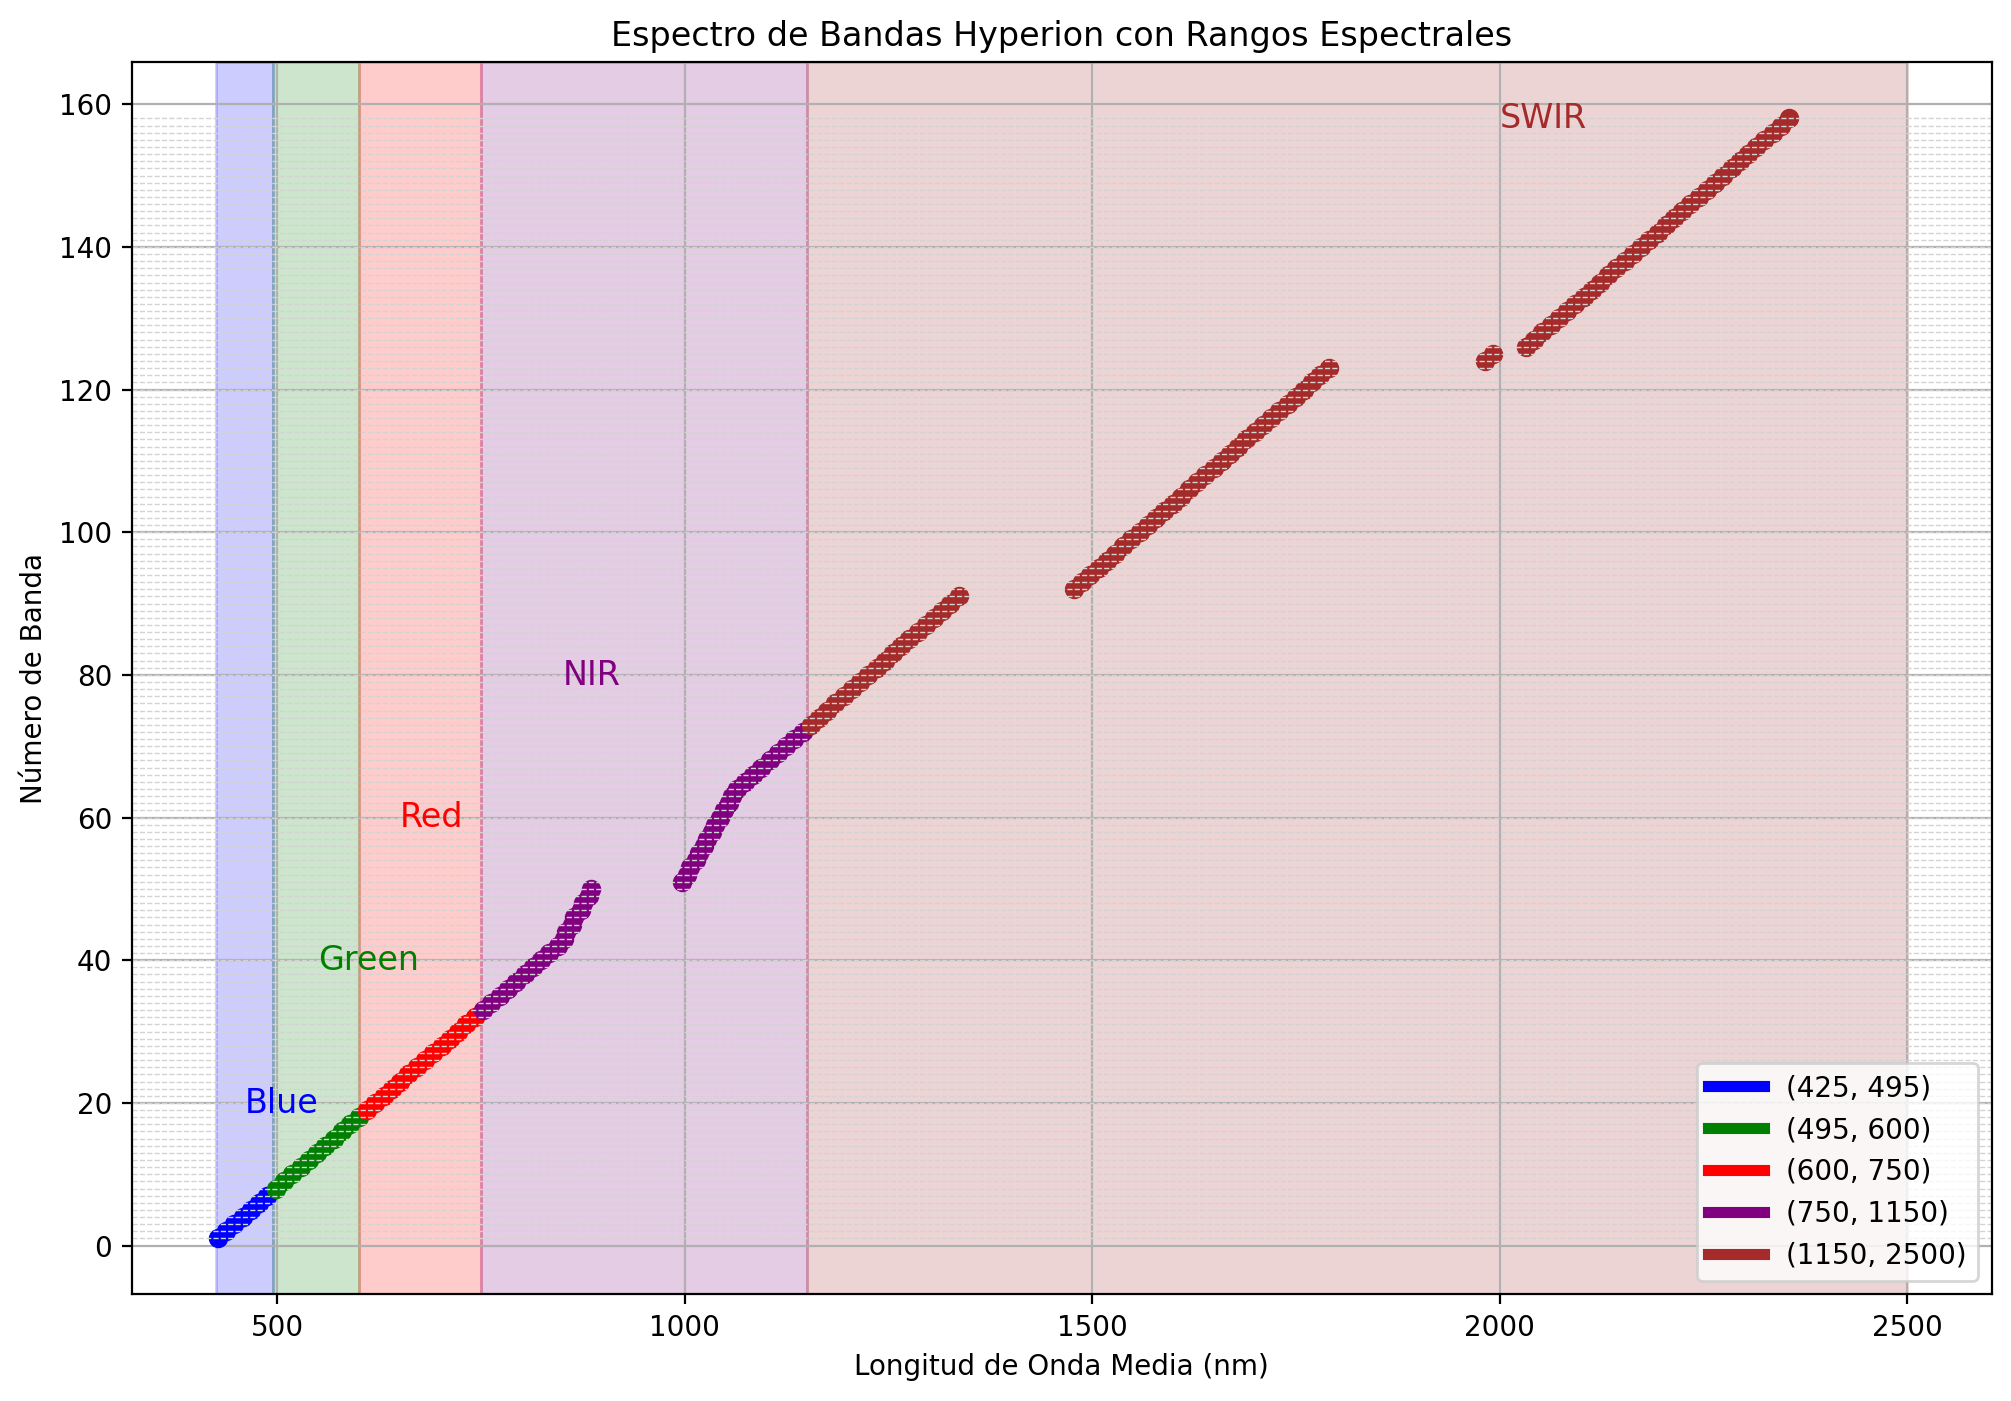

In [13]:
#@title Bandas vs Espectro


band_numbers = range(1, 159)
middle_wl = [426.82, 436.99, 447.17, 457.34, 467.52, 477.69, 487.87, 498.04, 508.22, 518.39, 528.57, 538.74, 548.92, 559.09, 569.27, 579.45, 589.62, 599.8, 609.97, 620.15, 630.32, 640.5, 650.67, 660.85, 671.02, 681.2, 691.37, 701.55, 711.72, 721.9, 732.07, 742.25, 752.43, 762.6, 772.78, 782.95, 793.13, 803.3, 813.48, 823.65, 833.83, 844, 851.92, 854.18, 862.01, 864.35, 872.1, 874.53, 882.19, 884.7, 996.63, 1003.3, 1006.81, 1013.3, 1016.98, 1023.4, 1027.16, 1033.49, 1037.33, 1043.59, 1047.51, 1053.69, 1057.68, 1063.79, 1073.89, 1083.99, 1094.09, 1104.19, 1114.19, 1124.28, 1134.38, 1144.48, 1154.58, 1164.68, 1174.77, 1184.87, 1194.97, 1205.07, 1215.17, 1225.17, 1235.27, 1245.36, 1255.46, 1265.56, 1275.66, 1285.76, 1295.86, 1305.96, 1316.05, 1326.05, 1336.15, 1477.43, 1487.53, 1497.63, 1507.73, 1517.83, 1527.92, 1537.92, 1548.02, 1558.12, 1568.22, 1578.32, 1588.42, 1598.51, 1608.61, 1618.71, 1628.81, 1638.81, 1648.9, 1659, 1669.1, 1679.2, 1689.3, 1699.4, 1709.5, 1719.6, 1729.7, 1739.7, 1749.79, 1759.89, 1769.99, 1780.09, 1790.19, 1981.86, 1991.96, 2032.35, 2042.45, 2052.45, 2062.55, 2072.65, 2082.75, 2092.84, 2102.94, 2113.04, 2123.14, 2133.24, 2143.34, 2153.34, 2163.43, 2173.53, 2183.63, 2193.73, 2203.83, 2213.93, 2224.03, 2234.12, 2244.22, 2254.22, 2264.32, 2274.42, 2284.52, 2294.61, 2304.71, 2314.81, 2324.91, 2335.01, 2345.11, 2355.21]


blue_range = (425, 495)
green_range = (495, 600)
red_range = (600, 750)
nir_range = (750, 1150)
swir_range = (1150, 2500)


fig, ax = plt.subplots(figsize=(12, 8))

color_map = {
    blue_range: 'blue',
    green_range: 'green',
    red_range: 'red',
    nir_range: 'purple',  # NIR (Infrarrojo cercano)
    swir_range: 'brown'   # SWIR (Infrarrojo de onda corta)
}

for wl, bn in zip(middle_wl, band_numbers):
    color = 'grey'  # Color por defecto para longitudes de onda fuera de los rangos de interés
    for wl_range, wl_color in color_map.items():
        if wl_range[0] <= wl <= wl_range[1]:
            color = wl_color
            break
    ax.plot(wl, bn, 'o', color=color)

for wl_range, wl_color in color_map.items():
    ax.axvspan(wl_range[0], wl_range[1], color=wl_color, alpha=0.2)

custom_lines = [plt.Line2D([0], [0], color=color, lw=4) for color in color_map.values()]
ax.legend(custom_lines, color_map.keys())

for bn in band_numbers:
    ax.axhline(y=bn, color='lightgrey', linewidth=0.5, linestyle="--")

ax.set_title('Espectro de Bandas Hyperion con Rangos Espectrales')
ax.set_xlabel('Longitud de Onda Media (nm)')
ax.set_ylabel('Número de Banda')
ax.grid(True)

ax.text(2000, 158, 'SWIR', fontsize=12, verticalalignment='center', color='brown')
ax.text(850, 80, 'NIR', fontsize=12, verticalalignment='center', color='purple')
ax.text(650, 60, 'Red', fontsize=12, verticalalignment='center', color='red')
ax.text(550, 40, 'Green', fontsize=12, verticalalignment='center', color='green')
ax.text(460, 20, 'Blue', fontsize=12, verticalalignment='center', color='blue')

plt.show()

In [14]:
#@title Cargue de los cubos espectrales (No alteres esta celda){ display-mode: "form" }

# Función para descargar un cubo espectral y cargarlo en una variable
def descargar_y_cargar_cubo_espectral(url):
    respuesta = requests.get(url)
    if respuesta.status_code == 200:
        cubo_espectral = np.load(BytesIO(respuesta.content),  allow_pickle=True)
        return cubo_espectral
    else:
        print(f"Error al descargar el archivo. Código de estado: {respuesta.status_code}")
        return None
urls_cubos = {
    "Alpes": "https://github.com/semilleroCV/Hands-on-Computer-Vision/raw/2024/Sesiones/Sesion4/Parte-1/spectral_cubes/spectral_cube_Alpes.npy",
    "Chernobyl" :"https://github.com/semilleroCV/Hands-on-Computer-Vision/raw/2024/Sesiones/Sesion4/Parte-1/spectral_cubes/spectral_cube_Chernobyl.npy",
    "Emiratos Arabes" :"https://github.com/semilleroCV/Hands-on-Computer-Vision/raw/2024/Sesiones/Sesion4/Parte-1/spectral_cubes/spectral_cube_EUA.npy",
    "Hawai":"https://github.com/semilleroCV/Hands-on-Computer-Vision/raw/2024/Sesiones/Sesion4/Parte-1/spectral_cubes/spectral_cube_Hawai.npy",
    "Lago Natron" :"https://github.com/semilleroCV/Hands-on-Computer-Vision/raw/2024/Sesiones/Sesion4/Parte-1/spectral_cubes/spectral_cube_LagoNatron.npy",
    "Paris":"https://github.com/semilleroCV/Hands-on-Computer-Vision/raw/2024/Sesiones/Sesion4/Parte-1/spectral_cubes/spectral_cube_Paris.npy",
    "Rio de Janeiro" :"https://github.com/semilleroCV/Hands-on-Computer-Vision/raw/2024/Sesiones/Sesion4/Parte-1/spectral_cubes/spectral_cube_Rio.npy",
    "Roma":"https://github.com/semilleroCV/Hands-on-Computer-Vision/raw/2024/Sesiones/Sesion4/Parte-1/spectral_cubes/spectral_cube_Roma.npy",
    "Salar Bolivia":"https://github.com/semilleroCV/Hands-on-Computer-Vision/raw/2024/Sesiones/Sesion4/Parte-1/spectral_cubes/spectral_cube_SalarBolivia.npy"
}

# Descargar y cargar los cubos en variables
cubos_espectrales = {}

for locacion, url in urls_cubos.items():
    cubos_espectrales[locacion] = descargar_y_cargar_cubo_espectral(url)


#Pavia
!gdown '1xKFfU8Yn-Al0TS4iPUfmlxJG6IsXb4Sl'
#Pavia_GT
!gdown '1vj1xBnOz2hvub8xsoqjLd1qHGiyIy8gH'

Failed to retrieve file url:

	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses.
	Check FAQ in https://github.com/wkentaro/gdown?tab=readme-ov-file#faq.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1xKFfU8Yn-Al0TS4iPUfmlxJG6IsXb4Sl

but Gdown can't. Please check connections and permissions.
Failed to retrieve file url:

	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses.
	Check FAQ in https://github.com/wkentaro/gdown?tab=readme-ov-file#faq.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1vj1xBnOz2hvub8xsoqjLd1qHGiyIy8gH

but Gdown can't. Please check connections and permissions.


In [15]:
#@title Funciones necesarias (No alteres esta celda){ display-mode: "form" }

def show_rgb_patch(locacion, bandas_rgb):
    cubo_espectral = cubos_espectrales.get(locacion)
    if cubo_espectral is not None:
        rgb_image = np.dstack([cubo_espectral[:, :, bn-1] for bn in bandas_rgb])
        if locacion == "Alpes":
            rgb_image = np.power(rgb_image, 0.55)
        rgb_image_norm = rgb_image / np.max(rgb_image, axis=(0, 1), keepdims=True)
        plt.figure(figsize=(8, 8))
        plt.imshow(rgb_image_norm)
        plt.title(f"Parche RGB de {locacion} - Bandas {bandas_rgb}")
        plt.show()
    else:
        print(f"No se encontró el cubo espectral para {locacion}.")

def visualize_multiple_bands(location, band_numbers):
    cubo_espectral = cubos_espectrales.get(location)
    if cubo_espectral is None:
        print(f"No se encontró el cubo espectral para {location}.")
        return
    fig, axes = plt.subplots(1, len(band_numbers), figsize=(5 * len(band_numbers), 5))
    if len(band_numbers) == 1:
        axes = [axes]
    for i, band_number in enumerate(band_numbers):
        band = cubo_espectral[:, :, band_number-1]
        ax = axes[i]
        im = ax.imshow(band, cmap='viridis')
        ax.set_title(f'Banda {band_number} - {location}')
        fig.colorbar(im, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
        ax.axis('off')  # Ocultar los ejes

    plt.show()

def mostrar_rgb_y_firma_espectral(locacion, coordenadas, bandas_rgb=[28, 17, 6]):
    cubo_espectral = cubos_espectrales.get(locacion)
    if cubo_espectral is None:
        print(f"No se encontró el cubo espectral para {locacion}.")
        return
    y, x = coordenadas
    lado_cuadro = 10

    rgb_image = np.dstack([cubo_espectral[:, :, bn-1] for bn in bandas_rgb])
    if locacion == "Alpes":
        rgb_image = np.power(rgb_image, 0.55)
    rgb_image_norm = rgb_image / np.max(rgb_image, axis=(0, 1), keepdims=True)

    rgb_con_cuadro = np.copy(rgb_image_norm)
    y_min, y_max = max(0, y - lado_cuadro // 2), min(rgb_image_norm.shape[0], y + lado_cuadro // 2)
    x_min, x_max = max(0, x - lado_cuadro // 2), min(rgb_image_norm.shape[1], x + lado_cuadro // 2)
    rgb_con_cuadro[y_min:y_max, [x_min, x_max]] = [1, 0, 0]
    rgb_con_cuadro[[y_min, y_max], x_min:x_max] = [1, 0, 0]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    ax1.imshow(rgb_con_cuadro)
    ax1.set_title(f"RGB {locacion}")

    firma_espectral = cubo_espectral[y, x, :]
    ax2.plot(firma_espectral)
    ax2.set_title(f'Firma Espectral - {locacion}')
    ax2.set_xlabel('Número de Banda')
    ax2.set_ylabel('Reflectancia')
    ax2.grid(True)

    plt.show()


def NDVI(location, nir_band, red_band):
    bandas_rgb = [28, 17, 6]  # Asumiendo que estas son las bandas correctas para RGB
    cubo_espectral = cubos_espectrales.get(location)

    if cubo_espectral is None:
        print(f"No se encontró el cubo espectral para {location}.")
        return

    # Crear la imagen RGB
    rgb_image = np.dstack([cubo_espectral[:, :, bn-1] for bn in bandas_rgb])
    if location == "Alpes":
        rgb_image = np.power(rgb_image, 0.55)
    rgb_image_norm = rgb_image / np.max(rgb_image, axis=(0, 1), keepdims=True)

    # Calcular NDVI
    banda_NIR = cubo_espectral[:, :, nir_band-1].astype(float)
    banda_RED = cubo_espectral[:, :, red_band-1].astype(float)
    ndvi = (banda_NIR - banda_RED) / (banda_NIR + banda_RED + 1e-10)
    ndvi[(ndvi < 0) | (ndvi > 1)] = 0

    # Visualización en subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 15))

    ax1.imshow(rgb_image_norm)
    ax1.set_title(f"RGB {location}")
    ax1.axis('off')  # Ocultar los ejes para la imagen

    im = ax2.imshow(ndvi, cmap='RdYlGn')
    ax2.set_title(f'NDVI - {location}')
    ax2.axis('off')  # Ocultar los ejes para la imagen
    fig.colorbar(im, ax=ax2, fraction=0.046, pad=0.04, label='Valor NDVI')

    plt.tight_layout()
    plt.show()


def GCI(location, nir_band, green_band):
    bandas_rgb = [28, 17, 6]
    cubo_espectral = cubos_espectrales.get(location)

    if cubo_espectral is None:
        print(f"No se encontró el cubo espectral para {location}.")
        return

    # Crear la imagen RGB
    rgb_image = np.dstack([cubo_espectral[:, :, bn-1] for bn in bandas_rgb])
    if location == "Alpes":
        rgb_image = np.power(rgb_image, 0.55)
    rgb_image_norm = rgb_image / np.max(rgb_image, axis=(0, 1), keepdims=True)

    # Calcular NDVI
    banda_NIR = cubo_espectral[:, :, nir_band-1].astype(float)
    banda_GREEN = cubo_espectral[:, :, green_band-1].astype(float)

    GCI = (banda_NIR / (banda_GREEN + 1e-10)) - 1
    GCI[(GCI < 0)] = 0
    GCI[(GCI > 11)] = 11

    # Visualización en subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 15))

    ax1.imshow(rgb_image_norm)
    ax1.set_title(f"RGB {location}")
    ax1.axis('off')  # Ocultar los ejes para la imagen

    im = ax2.imshow(GCI, cmap='RdYlGn')
    ax2.set_title(f'GCI - {location}')
    ax2.axis('off')  # Ocultar los ejes para la imagen
    fig.colorbar(im, ax=ax2, fraction=0.046, pad=0.04, label='Valor GCI')

    plt.tight_layout()
    plt.show()


def Pavia_rgbandgt ():
    # Cargar el archivo Pavia.mat y Pavia_gt.mat
    datos_espectrales = scipy.io.loadmat('Pavia.mat')['pavia']
    imagen_etiquetada = scipy.io.loadmat('Pavia_gt.mat')['pavia_gt']

    # Extraer bandas RGB y apilarlas
    rgb_image = np.dstack([datos_espectrales[:, :, i] for i in [60, 30, 2]])
    rgb_image_norm = ((rgb_image / rgb_image.max()) * 255).astype(np.uint8)
    rgb_image_norm_gamma = (rgb_image_norm ** 1.15).astype(np.uint8)

    # Configurar los subplots y mostrar las imágenes
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(rgb_image_norm_gamma)
    axs[0].set_title('Pavia RGB')
    axs[1].imshow(imagen_etiquetada, cmap='jet')
    axs[1].set_title('Pavia GroundTruth')
    cbar = plt.colorbar(axs[1].imshow(imagen_etiquetada, cmap='jet'), ax=axs[1])
    cbar.set_label('Clases')  # Establecemos el título del colorbar
    plt.show()


def view_spectralbandspavia():
    datos_espectrales = scipy.io.loadmat('Pavia.mat')['pavia']
    coordenadas_clases = {
        'Water': (167, 540), 'Trees': (84, 706), 'Asphalt': (319, 447),
        'Self-Blocking Bricks': (347, 460), 'Bitumen': (297, 487),
        'Tiles': (273, 373), 'Shadows': (617, 659), 'Meadows': (364, 194),
        'Bare Soil': (324, 61),
    }
    colores = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple']

    plt.figure(figsize=(12, 6))
    for (clase, coords), color in zip(coordenadas_clases.items(), colores):
        y, x = coords
        plt.plot(datos_espectrales[y, x, :], label=clase, color=color, linewidth=2)

    plt.title('Firmas Espectrales por Clase en Pavia')
    plt.xlabel('Número de Banda')
    plt.ylabel('Reflectancia')
    plt.grid(True)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    plt.show()


def cargue_cubo(location):
    cubo_espectral = cubos_espectrales.get(location)
    if cubo_espectral is None:
      print(f"No se encontró el cubo espectral para {location}.")
      return

    return cubo_espectral


def plot_msavi(cubo_espectral,location, msavi2):
    msavi2 = np.clip(msavi2, -1, 1.5)  # Normalizar los valores entre -1 y 1 para consistencia con NDVI
    # Crear la imagen RGB
    bandas_rgb = [28, 17, 6]  # Asumiendo que estas son las bandas correctas para RGB
    rgb_image = np.dstack([cubo_espectral[:, :, bn-1] for bn in bandas_rgb])
    if location == "Alpes":
        rgb_image = np.power(rgb_image, 0.55)
    rgb_image_norm = rgb_image / np.max(rgb_image, axis=(0, 1), keepdims=True)

    # Visualización en subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 15))

    ax1.imshow(rgb_image_norm)
    ax1.set_title(f"RGB {location}")
    ax1.axis('off')  # Ocultar los ejes para la imagen

    im = ax2.imshow(msavi2, cmap='RdYlGn')
    ax2.set_title(f'MSAVI2 - {location}')
    ax2.axis('off')  # Ocultar los ejes para la imagen
    fig.colorbar(im, ax=ax2, fraction=0.046, pad=0.04, label='Valor MSAVI2')

    plt.tight_layout()
    plt.show()

Hemos seleccionado una variedad de ubicaciones fascinantes alrededor del mundo, cada una elegida por su potencial único para revelar distintos aspectos en el análisis: desde playas hasta salares, lagos de soda, y más.  :D

<div align="center"> <image src="https://github.com/semilleroCV/Hands-on-Computer-Vision/blob/2024/Sesiones/Sesion4/Parte-1/images/Collage.png?raw=true" width=700>  </div>


Las ubicaciones son las siguientes:


* <font color='#4C5FDA'>**Alpes**</font>
*   **Chernobyl**
* <font color='#4C5FDA'>**Emiratos Arabes**</font>
*   **Hawai**
* <font color='#4C5FDA'>**Lago Natron**</font>
*   **Paris**
* <font color='#4C5FDA'>**Rio de Janeiro**</font>
*   **Roma**
* <font color='#4C5FDA'>**Salar Bolivia**</font>



Selecciona una ubicación de la lista, asegurándote de escribirla entre comillas tal y como aparece en ella. Luego, elige tres bandas que consideres corresponden a los colores Rojo, Verde y Azul. Para tomar una decisión informada, revisa el gráfico de bandas que compartimos anteriormente.



In [16]:
cubos_espectrales.keys()

dict_keys(['Alpes', 'Chernobyl', 'Emiratos Arabes', 'Hawai', 'Lago Natron', 'Paris', 'Rio de Janeiro', 'Roma', 'Salar Bolivia'])

In [18]:
# Revisa el tamaño de los datos
cubos_espectrales["Rio de Janeiro"].shape

(256, 256, 158)

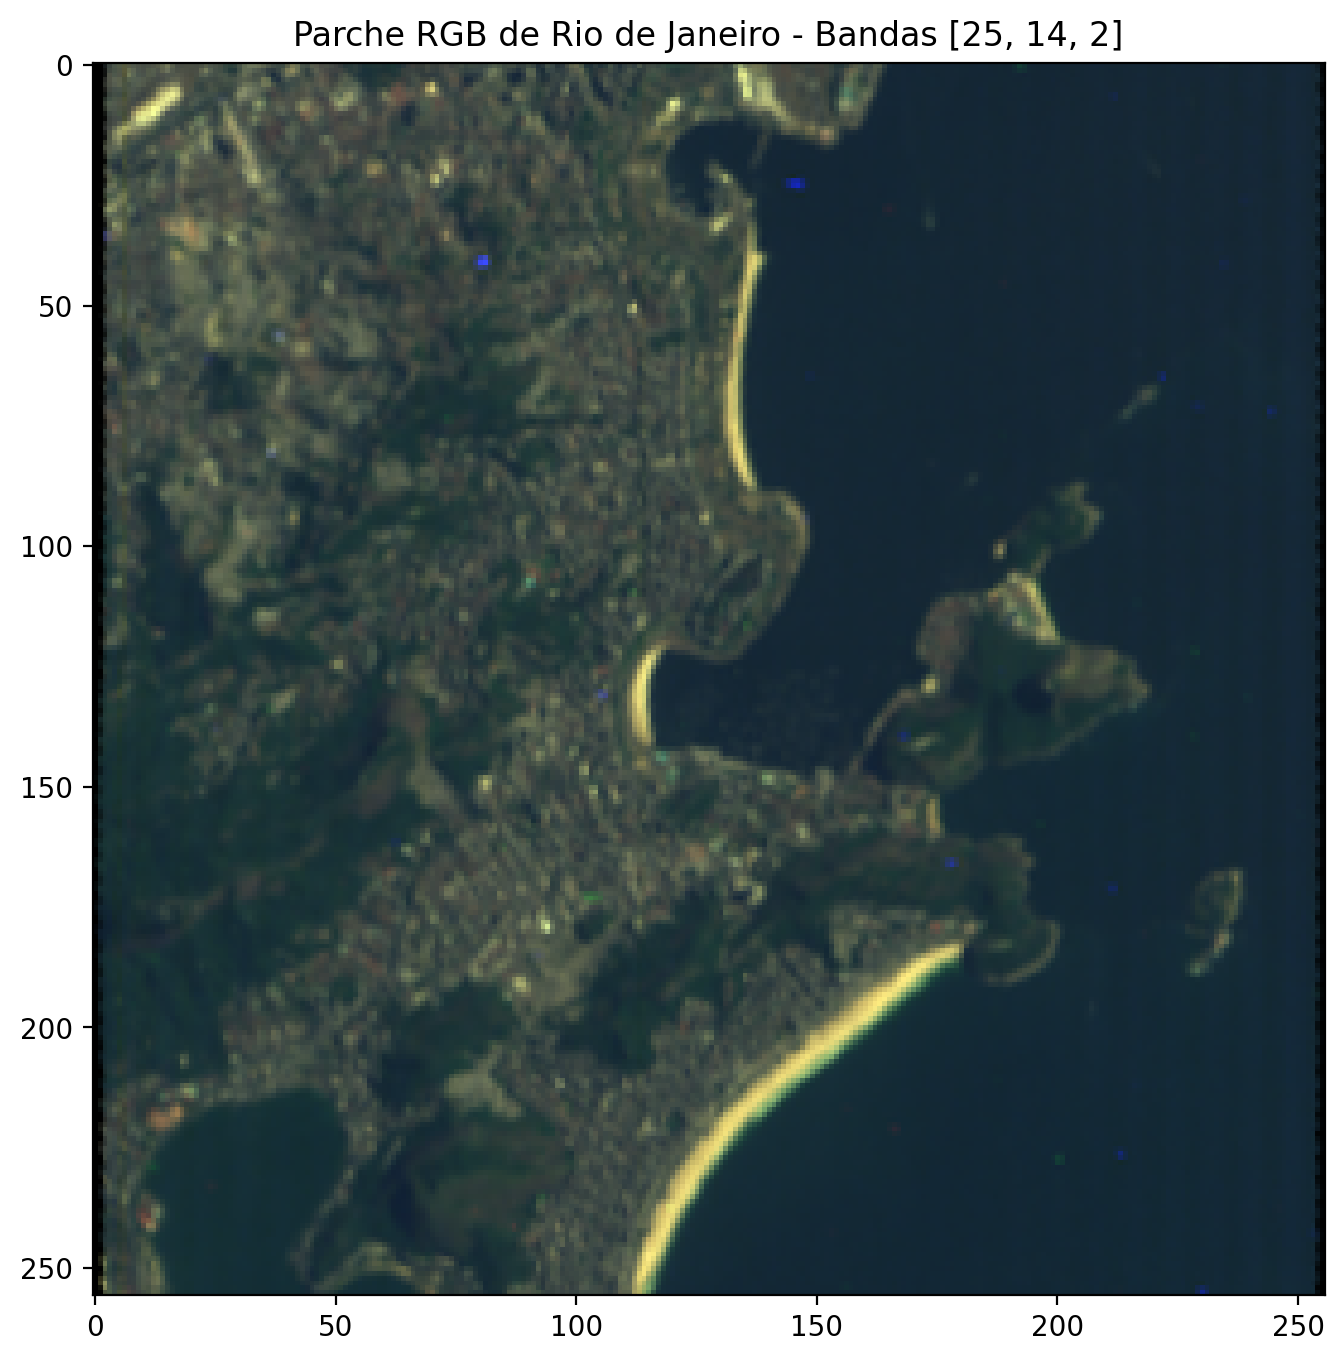

In [20]:
show_rgb_patch("Rio de Janeiro" , [25, 14, 2])

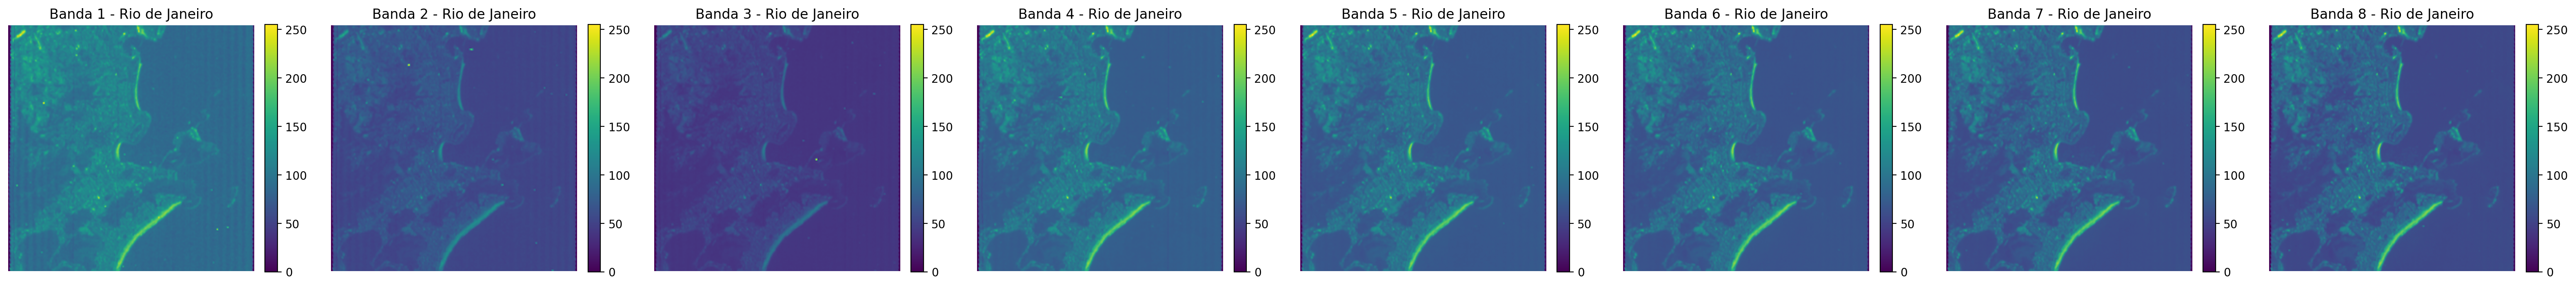

In [21]:
visualize_multiple_bands("Rio de Janeiro", [1,2,3,4,5,6,7,8])

<font color='#0BAB4D'>**Analicemos una firma espectral de Hyperion**</font>

Elige algun lugar de la lista de ubicaciones de hyperion que fue previamente proporcionada e indica las coordenadas (Y,X) del pixel del cual deseas examinar la firma espectral. En la visualización, se resaltará la ubicación escogida con un pequeño cuadro rojo, ofreciéndote una referencia visual aproximada de la área donde se ubica el pixel seleccionado.

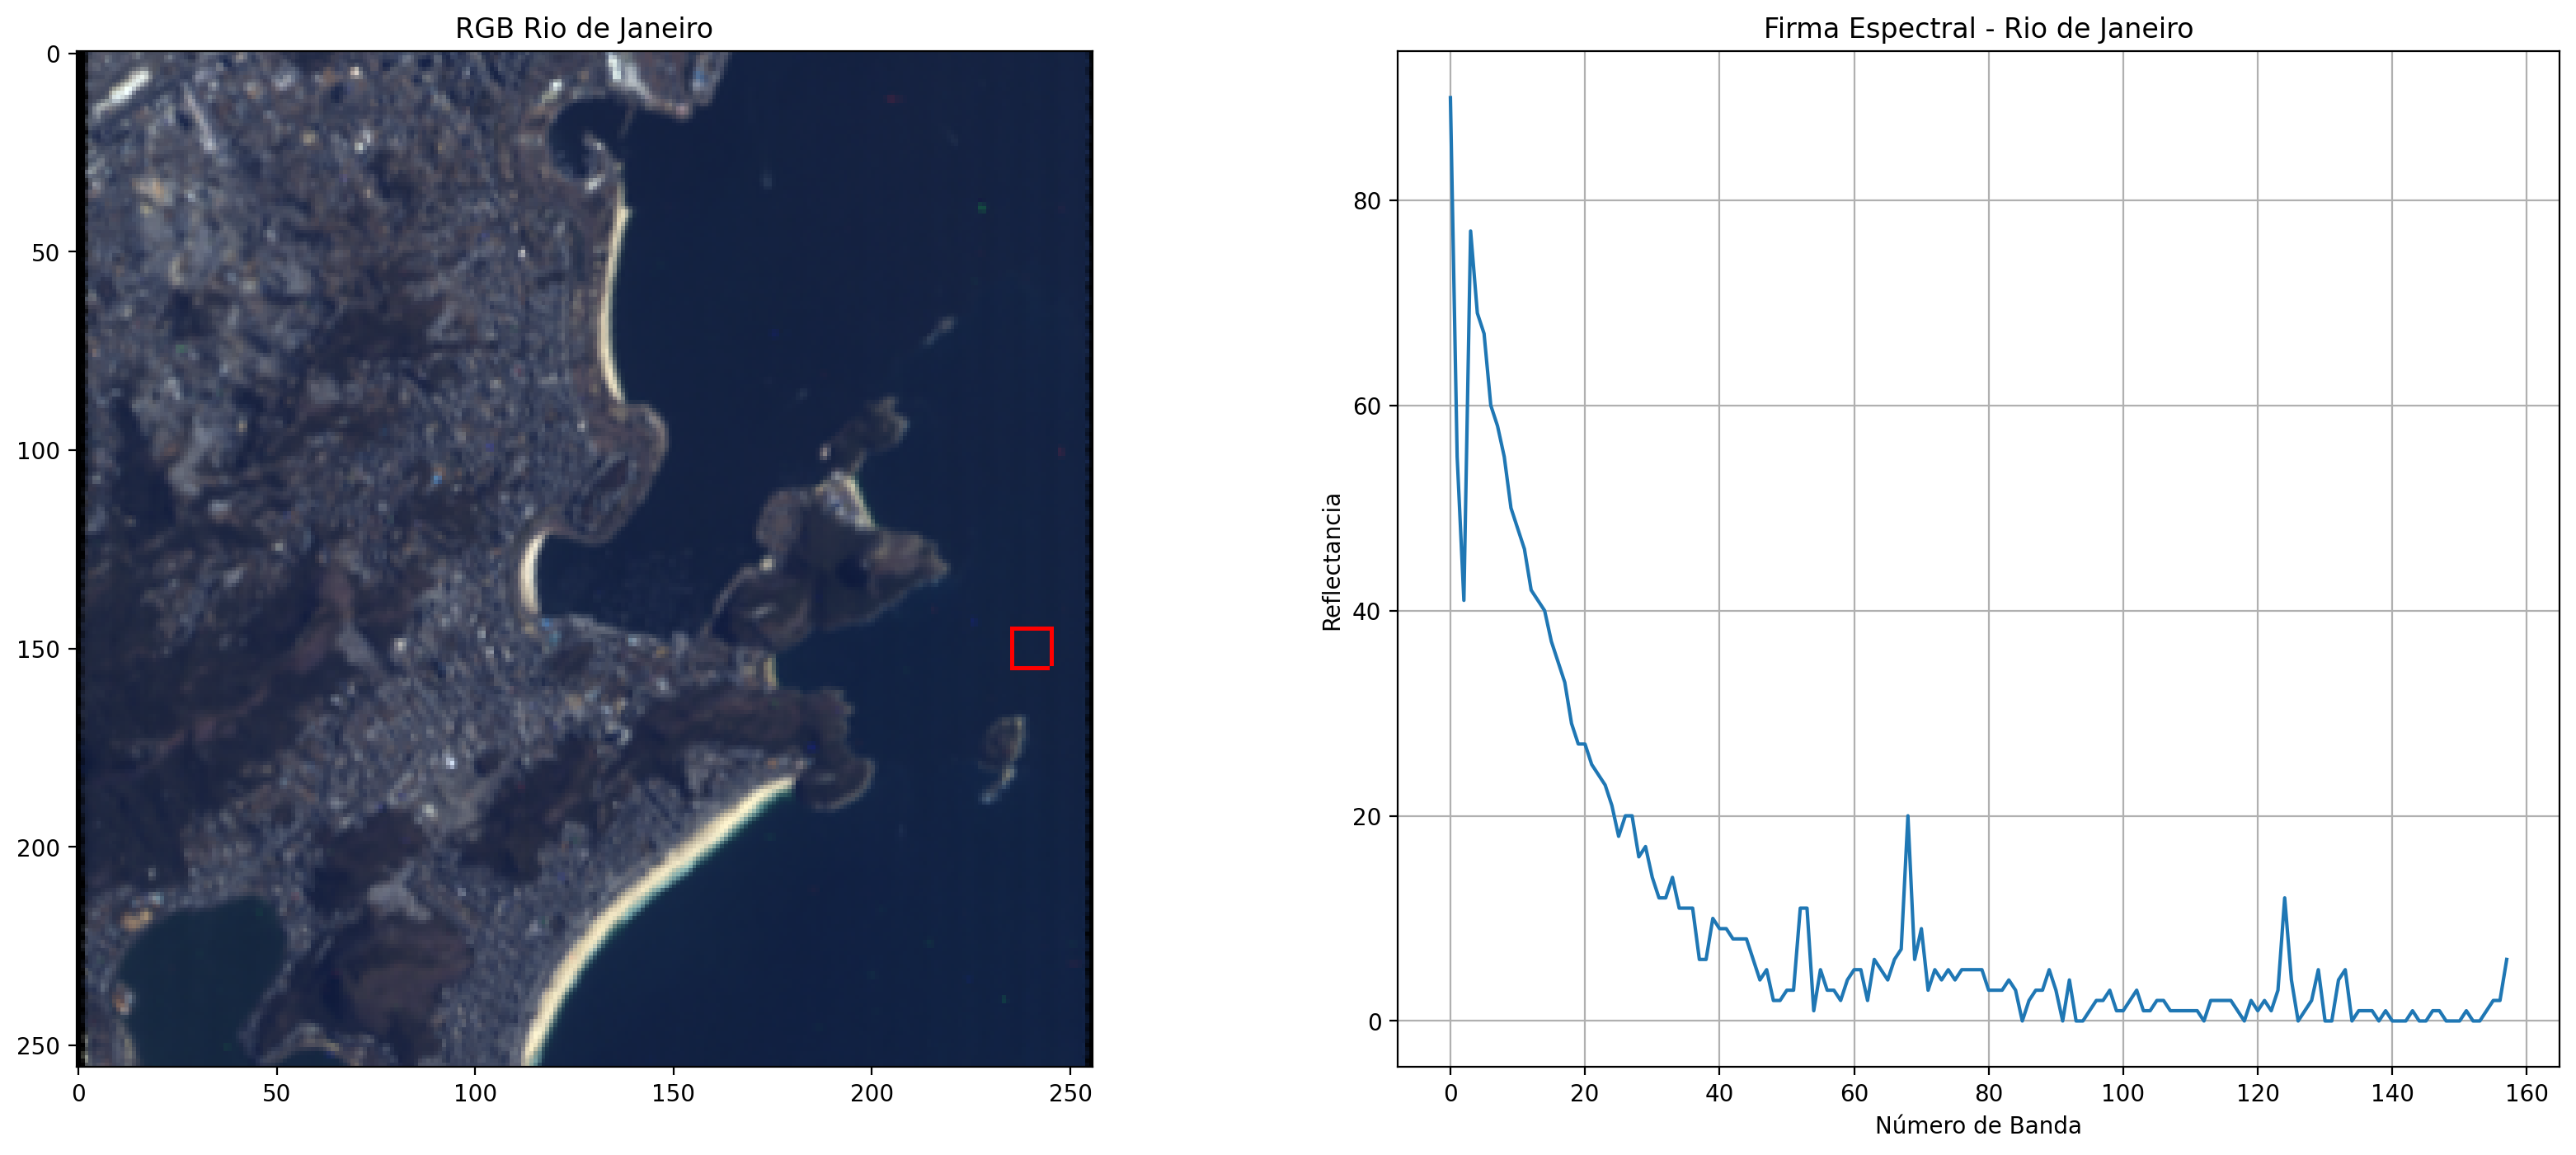

In [23]:
mostrar_rgb_y_firma_espectral("Rio de Janeiro", (150, 240))

# <font color='#4C5FDA'>**Desmezclado espectral**</font>

En teledetección, el espectro de un píxel se compone de más de un material, lo que se conoce como píxel "mixto". Por ejemplo, en la imagen siguiente (las líneas amarillas designan los píxeles), si midiéramos el espectro del píxel central, tendría firmas de árbol, hierba y arena. **A menudo es útil conocer el porcentaje de cada material en cada píxel, lo que se denomina desmezcla hiperespectral**.

<img src="https://raw.githubusercontent.com/CristianR8/Imagenes-Espectrales-Sesion4-Parte1-HoCV/main/images/Picture05.png" width="600" align="middle"/>

¿En qué consiste el desmezclado espectral?

* Determinaremos Endmembers: así llamaremos a las firmas espectrales puras que se encuentran en una escena. Son aquellas que solo representan UN material.

* Calcularemos la proporción de cada endmember que se encuentra en cada píxel.

* Esto es un análisis subpixel ya que estamos determinando cantidades subpixel de cada material en cada pixel.

Cuando se realiza unmixing hiperespectral, primero debemos asumir un modelo de mezcla particular.  

El modelo de mezcla más utilizado en la práctica es el *Modelo de Mezcla Lineal* (también conocido como *Modelo de Geometría Convexa*).  Aunque es el más utilizado, a menudo no se cumple en la práctica.

<img src="https://raw.githubusercontent.com/CristianR8/Imagenes-Espectrales-Sesion4-Parte1-HoCV/main/images/Picture07.png" align="middle"/>



Para esta sesión usaremos dos algoritmos que nos permitirán realizar el desmezcaldo espectral, a continuacion hablaremos de ellos.

## <font color='#ECA702'>**Pixel Purity Index (PPI)**</font>

<div style='text-align: justify;'>
    El Pixel Purity Index (PPI) es un algoritmo utilizado en el procesamiento de imágenes de teledetección, especialmente en el análisis de imágenes hiperespectrales, para identificar los píxeles más puros de un conjunto de datos. Estos píxeles puros representan firmas espectrales únicas que corresponden a materiales específicos presentes en la imagen. El algoritmo se basa en la proyección iterativa de los datos de la imagen sobre un plano generado aleatoriamente, identificando los píxeles que se proyectan a los extremos del espacio de datos como los más puros. Este proceso se repite múltiples veces, acumulando la frecuencia con la que cada píxel se identifica como puro. Los píxeles que se identifican con mayor frecuencia se consideran representativos de materiales únicos en la escena, y se pueden utilizar para la clasificación de la cobertura terrestre, la identificación de minerales, o el análisis de vegetación, entre otros.
</div>

## <font color='#ECA702'>**Fully Constrained Least Squares (FCLS)**</font>

<div style='text-align: justify;'>
    El Fully Constrained Least Squares (FCLS) es un algoritmo de desmezcla espectral utilizado en el análisis de imágenes hiperespectrales. Su objetivo es descomponer el espectro de un píxel mixto en las firmas espectrales de los componentes puros (endmembers) presentes en ese píxel, estimando la abundancia de cada componente. A diferencia de otros métodos de desmezcla, el FCLS incorpora dos restricciones importantes: las abundancias estimadas deben ser no negativas y la suma de todas las abundancias en un píxel debe ser igual a uno (conservación de la masa). Estas restricciones aseguran que las soluciones sean físicamente plausibles. El FCLS es ampliamente utilizado en aplicaciones de teledetección para cuantificar la cobertura y la composición de la superficie terrestre, como la identificación de tipos de vegetación, el mapeo de minerales, o la evaluación de la urbanización, proporcionando una herramienta valiosa para el análisis ambiental y de recursos naturales.
</div>

In [24]:
# Cargar imagen del campus de gulfport
img_fname = 'muufl_gulfport_campus_w_lidar_1.mat'
spectra_fname = 'tgt_img_spectra.mat'

dataset = loadmat(img_fname)['hsi']
wavelengths = dataset['info'][0][0]['wavelength'][0][0]

hsi = dataset['Data'][0][0]

In [25]:
hsi.shape

(325, 337, 72)

In [26]:
hsi = hsi[:,:,4:-4]  # Recortar bandas ruidosas al inicio y al final del cubo de datos HSI (Imagen Hiperespectral)
n_r, n_c, n_b = hsi.shape  # Obtiene las dimensiones del cubo HSI recortado: número de filas (n_r), columnas (n_c) y bandas (n_b)
wvl = wavelengths[4:-4]  # Obtiene las longitudes de onda de las bandas conservadas, excluyendo las bandas ruidosas
rgb = dataset['RGB']  # Extrae la imagen RGB correspondiente al dataset HSI para visualización


## **<font color='#ECA702'>**<font color='#ECA702'>**<font color="#FF0000">R</font><font color="#FF7F00">e</font><font color="#FFFF00">t</font><font color="#00FF00">o</font><font color="#0000FF"> #</font><font color="#9400D3">1</font> 💪**</font>

* Extraer algunos endmembers mediante el algoritmo Pixel Purity Index usando PySptools de https://pysptools.sourceforge.io
* Ejercicio: Variar el número de endmembers y el número de pinchos para ver los cambios en la estimación de endmember.
* Trazar los endmembers que encontramos en una gráfica
* Encontrar abundancias dados los endmembers (Usando FCLS)
* Mostrar los mapas de abundancia en una gráfica


In [27]:
import pysptools.eea as eea # Endmember extraction algorithms
import pysptools.abundance_maps as abundance # Abundance maps algorithms

In [32]:
# extraer algunos endmembers mediante el algoritmo Pixel Purity Index
# usando PySptools de https://pysptools.sourceforge.io
# Ejercicio: Variar el número de endmembers y el número de 'spikes' para ver los cambios en la estimación de endmember.

q = 2 # Número de Endmembers
numSkewers = 5000 # Parámetro PPI del número de proyecciones utilizadas para encontrar puntos de datos extremos que pueden ser endmembers


# Ejecutamos PPI
ppi = eea.PPI()
E = ppi.extract(hsi, numSkewers=numSkewers, q=q)

Text(0.5, 1.0, 'PPI Endmembers')

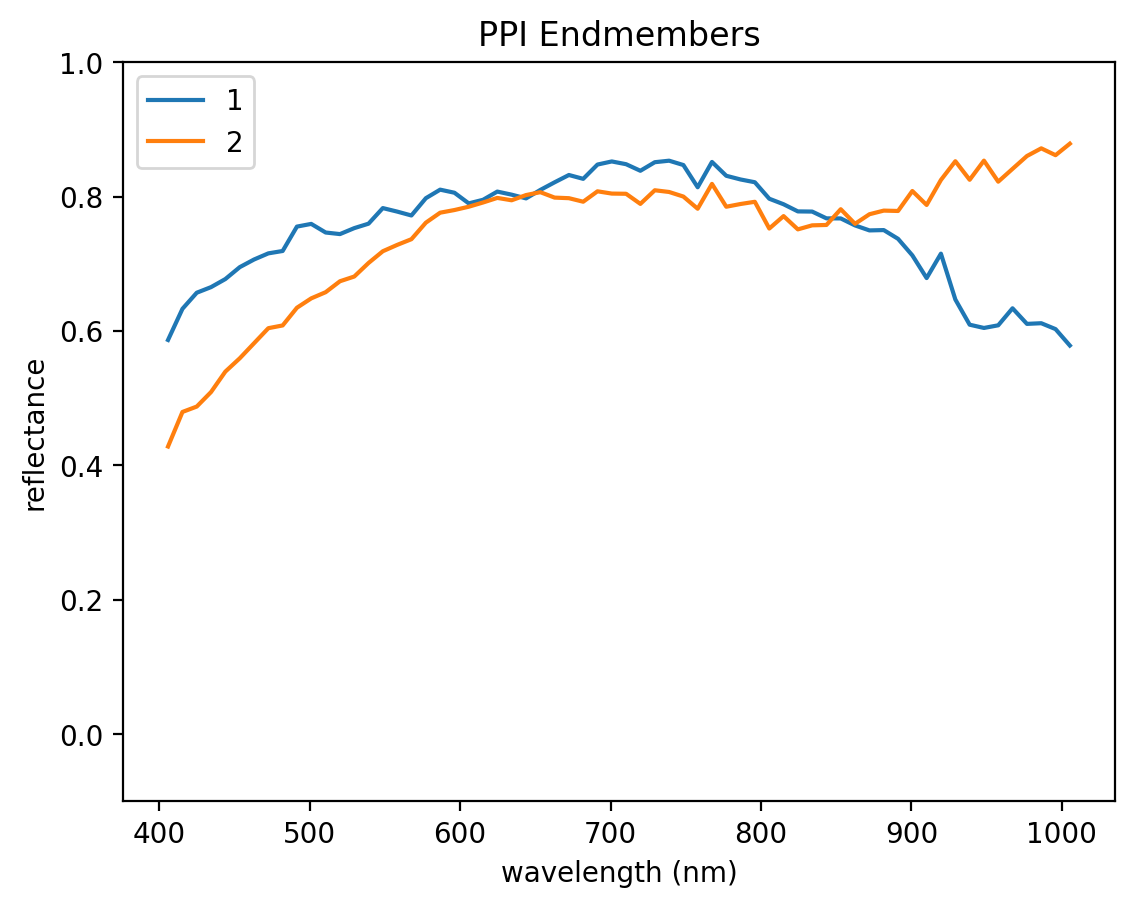

In [33]:
# Trazar los endmembers que encontramos
plt.plot(wvl,E.T)
plt.xlabel('wavelength (nm)')
plt.ylabel('reflectance')
plt.legend([str(i+1) for i in range(q)], loc = 'upper left')
plt.ylim((-0.1,1))
plt.title("PPI Endmembers")

Tras estimar los espectros de los miembros finales, podemos estimar las abundancias/proporciones de cada píxel de la imagen.  Para ello utilizaremos el algoritmo FCLS.  (Hay muchos algoritmos en la literatura que estiman proporciones dados los endmembers.  FCLS es sólo un ejemplo).

In [34]:
# encontrar abundancias dados los endmembers
fcls = abundance.FCLS()
maps = fcls.map(hsi, E) # Esto funciona lentamente con grandes conjuntos de datos/más endmembers.

In [35]:
maps.shape

(325, 337, 2)

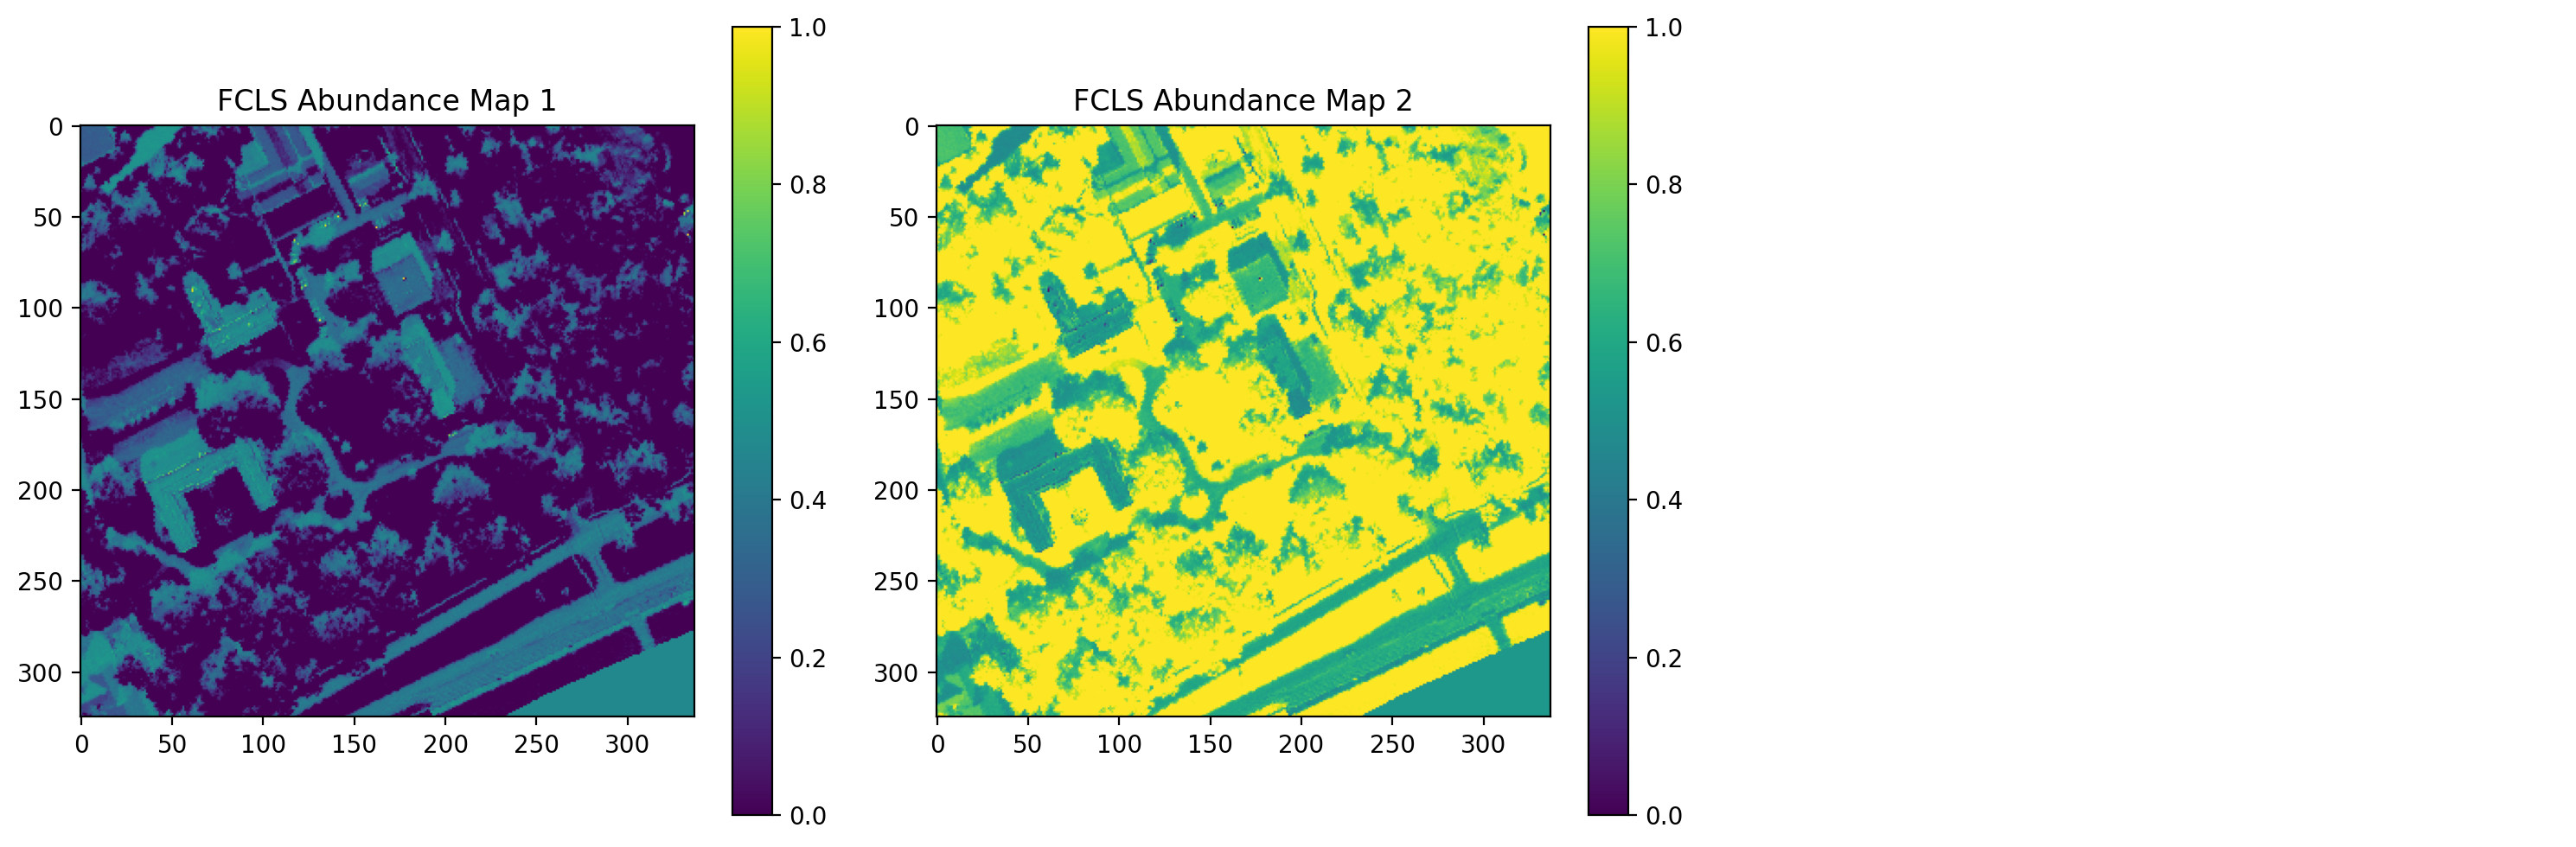

In [36]:
# NO MODIFIQUE ESTA CELDA
# Mostrar mapas de abundancia
map_imgs = []  # Inicializa una lista vacía para almacenar las imágenes de los mapas de abundancia
for i in range(q):  # Itera sobre cada componente q identificado
    map_lin = np.zeros((n_r*n_c,))  # Crea un array lineal lleno de ceros con tamaño igual al número total de píxeles
    map_lin = maps[:,:,i]
    map_imgs.append(np.reshape(map_lin, (n_r, n_c)))  # Convierte el array lineal en una matriz 2D y la agrega a la lista

# Determina el número de filas y columnas para la cuadrícula de subplots
n_cols = 3  # Número de columnas por fila; ajustable según necesidad
n_rows = (q + n_cols - 1) // n_cols  # Calcula las filas necesarias, redondeando hacia arriba

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 5))  # Crea una figura y subplots con las dimensiones calculadas

# Si hay menos gráficos que espacios, hace invisibles los ejes no usados
for ax in axes.flat[len(map_imgs):]:
    ax.axis('off')

# Itera sobre el número de mapas y los grafica
for i, ax in enumerate(axes.flat):
    if i < len(map_imgs):  # Verifica si el índice está dentro del rango de mapas disponibles
        im = ax.imshow(map_imgs[i], vmin=0, vmax=1)  # Muestra el mapa de abundancia i con una escala de 0 a 1
        fig.colorbar(im, ax=ax)  # Añade una barra de color al subplot para indicar la escala
        ax.set_title(f'FCLS Abundance Map {i+1}')  # Establece el título del subplot

plt.tight_layout()  # Ajusta automáticamente los subplots para que encajen en la figura
plt.show()  # Muestra la figura con todos los mapas de abundancia


Alternativamente, podemos estimar los endmembers, el número de endmembers y las abundancias simultáneamente utilizando el algoritmo SPICE.  SPICE también es aplicable a conjuntos de datos muy mezclados, ya que no supone que los espectros de los miembros finales puedan encontrarse en el conjunto de datos.  Por supuesto, éste es sólo un ejemplo de este tipo de algoritmo en la literatura.

El código Matlab para SPICE se puede encontrar aquí: <url>https://github.com/GatorSense/SPICE</url>

# **¿Qué tipo de análisis puede realizarse con una imagen hiperespectral?**

Entre las técnicas habituales de análisis de imágenes hiperespectrales se incluyen:

 * **Desmezcla hiperespectral**:  El objetivo del desmezclado hiperespectral es descomponer un cubo de imagen en las firmas espectrales *puras* que se encuentran en una escena (llamadas **miembros finales**) y la cantidad (o **proporción**) de cada miembro final que se encuentra en cada píxel. Se trata de un análisis *subpíxel*, ya que estamos determinando cantidades subpíxel de cada material en cada píxel.

  * **Detección de objetivos subpíxel**: Detección de un objetivo (de tamaño subpíxel) en una escena hiperespectral.  

  * **Clasificación**: Clasificación de cada píxel (o parte de un píxel) en una de varias categorías o clases de interés.
